**Problem 3: Least squares approximation**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**3.1** Solver linear system based on QR factorization

In [8]:
# fix  seed  for  reproducible  result. Please  do not  change  the  seed
np.random.seed(2022)
A = np.random.randn(20, 20)
x = np.random.randn(20,1)
b = A@x


def QR(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

def backSubstitute(R, b_Q):
    n = len(R)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b_Q[i] - np.sum(np.fromiter((R[i, j] * x[j] for j in range(i + 1, n)), dtype=float))) / R[i, i][()]
    return x

def mySolver(A, b):
    Q, R = QR(A)
    b_Q = Q.T @ b
    x = backSubstitute(R, b_Q)
    return x

def relative_diff(x, x_hat):
    err = np.linalg.norm(x - x_hat) / np.linalg.norm(x)
    return err

# fix seed for reproducible result
np.random.seed(2022)
A = np.random.randn(20, 20)
x = np.random.randn(20, 1)
b = A @ x

x_hat = mySolver(A, b)
print("The relative error:")
print(relative_diff(x, x_hat))

The relative error:
6.138675112035724


<ipython-input-8-1b9b244dfbba>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b_Q[i] - np.sum(np.fromiter((R[i, j] * x[j] for j in range(i + 1, n)), dtype=float))) / R[i, i][()]



**3.2** Data fitting by univariate linear regression

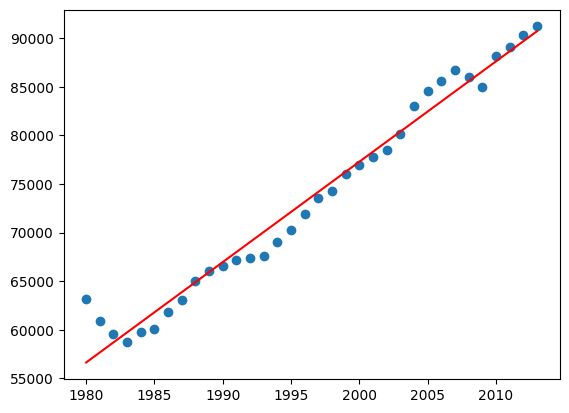

In [9]:
b_consumption = np.array([
        63122, 60953, 59551, 58785, 59795, 60083, 61819, 63107, 64978, 66090,
        66541, 67186, 67396, 67619, 69006, 70258, 71880, 73597, 74274, 75975,
        76928, 77732, 78457, 80089, 83063, 84558, 85566, 86724, 86046, 84972,
        88157, 89105, 90340, 91195 ], dtype=np.float64)

n = len(b_consumption)
# Generate the matrix A according to formula (30)
A_consumption = np.vstack((np.arange(1980, 2014), np.ones(n))).T

# Solve the least-squares problem
x_hat_consumption = mySolver(A_consumption, b_consumption)

# plot the line fitting
plt.figure()
plt.scatter(np.arange(1980,2014), b_consumption)
plt.plot(np.arange(1980,2014), A_consumption @ x_hat_consumption, 'r')
plt.show()

**3.3** (Extra-credit) Data fitting with multiple features

In [12]:
import House_Sales_Data

D = House_Sales_Data.house_sales_data()
beds = np.array(D['beds']).reshape([-1,1])
sizes = np.array(D['area']).reshape([-1,1])
prices = np.array(D['price']).reshape([-1,1])
n_houses = prices.shape[0]

# Generate the matrix A according to formula (31)
A_houses = np.hstack((beds, sizes, np.ones((n_houses, 1))))

# Find x_hat_houses using the mySolver function
x_hat_houses = mySolver(A_houses, prices)

# Compute the predicted prices
predicted_prices = A_houses @ x_hat_houses

# Compute the average difference between the predicted prices and the actual prices
avg_diff = np.mean(np.abs(prices - predicted_prices))

print(f"Value of x_hat for house data:\n {x_hat_houses}\n")
print(f"Value of x_hat for house data:\n {x_hat_houses}\n")
print(f"Average price difference: {avg_diff:.2f}")
print(f"Average price difference relative to the average housing prices (should be less than 30%):")
print(f"{avg_diff/np.average(prices)*100:.2f}%")

Value of x_hat for house data:
 [-18.85335788 148.7250726   54.4016736 ]

Value of x_hat for house data:
 [-18.85335788 148.7250726   54.4016736 ]

Average price difference: 105.30
Average price difference relative to the average housing prices (should be less than 30%):
46.03%


<ipython-input-8-1b9b244dfbba>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = (b_Q[i] - np.sum(np.fromiter((R[i, j] * x[j] for j in range(i + 1, n)), dtype=float))) / R[i, i][()]
